<a href="https://colab.research.google.com/github/MonitSharma/Computational-Methods-in-Physics/blob/main/Lecture14_Solving_Ordinary_Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving Ordinary Differential Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Solving equations numerically is a useful skill, but was not terribly difficult to code ourselves. The situation quickly escalates when we move from solving algebriac equations to differential equations. In principle we can still do it outselves but the job is definiely more complex.

---------

We will again take an experimental approach, we will start with a problem we know how to solve and try to see what is happening. Let's take the case of the 1d harmonic oscilator (e.g. a ball connected to a spring with friction).


---------

Recall that a spring is a linear force (i.e. the force of the spring is proportional to the distance) and friction is proptional to the velocity, both acting against increasing $x$ or $v$

$$ F = -\kappa x(t) - \Gamma v(t) $$

and , of course,

$$ F= m a = m \frac{d}{dt} v = \frac{d^2}{dt^2} x(t) $$

--------

Combing this equations gives,

$$ m a = - \kappa x(t) - \Gamma v(t) $$

or 

$$ m \ddot x + \Gamma \dot x + \kappa x = 0 $$

-------------

It is conventional to divide by mass to get:

$$ \ddot x + \gamma \dot x + \omega_0^2 x = 0 $$


where $\gamma = \Gamma/m$ and $\omega_0^2 = \kappa /m$



-----------

You might think that we want we solve this is to define this function directly and solve it using some fancy code that sets the function to zero. Instead, the way that python deals with this equation requires that we write it as two seperate equations. This is perhaps the part that is more annoying, "Why can't I just write the equation I want to solve???". We can try to work out the advantages later, but for now you just have to deal with it.


--------------

In this case, we define it in terms of equations that involve only one derivative. In this case that means

$$ \dot x = v $$

and

$$ \dot v = -\gamma v - \omega_0^2 x $$

-----------

So we have two variables, position $x$ and velocity $v$ , that both evolve according to first order ODEs but their evolution is coupled ($\dot v$ depends on $x$)


---------


You can imagine why writing this way is useful , by remembering that we can solve for a first order equation by integration:

$$ \frac{d}{dt} f(t) = g(t) \to f(t)-f(t_0) = \int_{t_0}^t dt' g(t') $$


in this sense, the computer is probably going to solve this equation by treating it as a simple integral at each time step and then add up the effect of all the time steps.

To implement this in python, we need to define a function that, given a v and x, returns these two derivatives:


In [2]:
def derivative(X,t,gamma=1,omega_0=1): ## X is the array [x,v]
        ## notice that we need to use t as an argument even though we don't use it
    return np.array([X[1],-gamma*X[1]-omega_0**2*X[0]]) ## return the array dot X defined by our equation


In [3]:
from scipy import integrate

We have defined the equation. We now need to know the initial conditions and where we are solving this (this is numerical, so we have to pick some finite amount of time):

In [4]:
t_R=np.linspace(0,10,100) # range of time we want to solve
X0=[3.,0]     #initial conditions

Now we use the basic ODE integrator in scipy

In [5]:
sol1=integrate.odeint(derivative,X0,t_R)  #syntax - odeint(derivative,initial conditon, time)


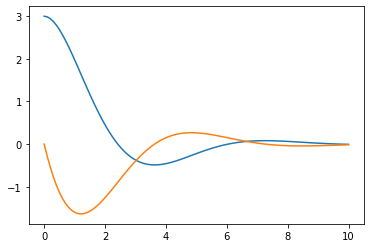

In [6]:
plt.plot(t_R,sol1[:,0])  # returns solution for X at each point in time  sol[:,0] is x(t)
plt.plot(t_R,sol1[:,1])  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.show()

One way to think about what our odeint is doing is moving our solution through "phase space", namely (v,x). Time allows us to define a path through this space but we can think of the results as just a curve as so:

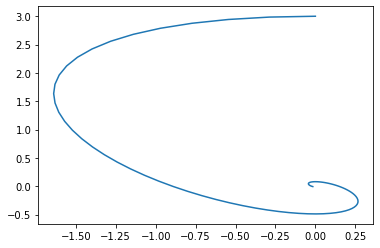

In [7]:
plt.plot(sol1[:,1],sol1[:,0])  #phase space plot
plt.show()

I secretly planned ahead when I derived my derivative function. Because odtint takes a function as input, you can pass any of the variabels that the function defines. This goes under the "args" option, where we pass this assition infomration

In [8]:
sol2=integrate.odeint(derivative,X0,t_R,args=(2,20)) # now passing gamma=2 and omega_0=20


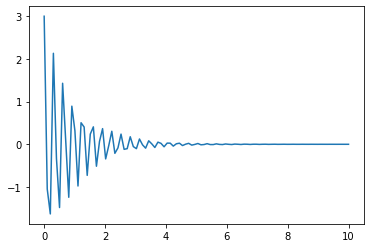

In [9]:
plt.plot(t_R,sol2[:,0])  # returns solution for X at each point in time  sol[:,0] is x(t)
#plt.plot(t_R,sol2[:,1])  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.show()

Now let's see how well it is tracking the exact solution. To make this extra easy, let's take $\gamma = 0$ so that our solution should be:

$$ x(t) = 3 \cos(\omega_0 t) $$

In [10]:
sol3=integrate.odeint(derivative,X0,t_R,args=(0,20)) # now passing gamma=0 and omega_0=20


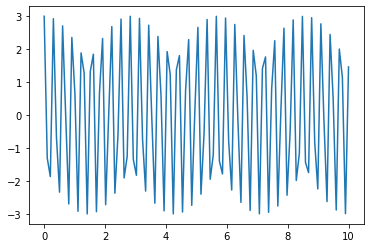

In [11]:
plt.plot(t_R,sol3[:,0])  # returns solution for X at each point in time  sol[:,0] is x(t)
#plt.plot(t_R,3*np.cos(20*t_R))  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.show()

At first sight, our solution clearly looks wrong. Our exact solution is supposed to be a pure cosine and it looks like it is the produce of two oscilations. But this isn't what is happening, because the error is actually pretty small:

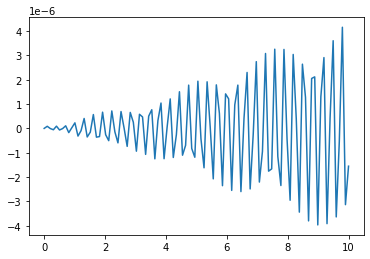

In [12]:
plt.plot(t_R,sol3[:,0]-3*np.cos(20*t_R))  # returns solution for X at each point in time  sol[:,0] is x(t)
#plt.plot(t_R,3*np.cos(20*t_R))  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.show()

Instead, we have encountered the aliasing. This is what happens whe you sample an oscilation at too low a frequency. Basically what is happening is that we are sampling our function at too slow a rate to resolve the actual oscilation properly so what comes out is something that looks like a lower frequency. We can see that just by increasing the spacing between the points.

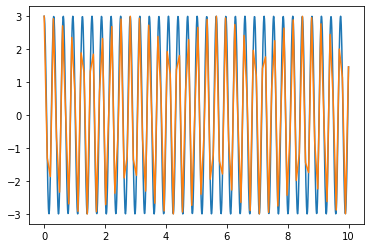

In [13]:
t_n=np.linspace(0,10,1000)
plt.plot(t_n,3*np.cos(20*t_n))
plt.plot(t_R,3*np.cos(20*t_R))

Knowing that, we can do the same for our solution:

In [14]:
sol3n=integrate.odeint(derivative,X0,t_n,args=(0,20)) # now passing gamma=0 and omega_0=20


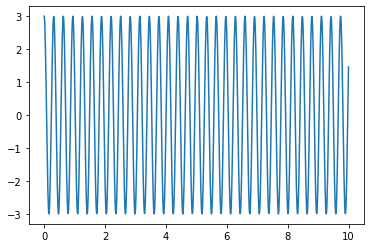

In [15]:
plt.plot(t_n,sol3n[:,0])  # returns solution for X at each point in time  sol[:,0] is x(t)
#plt.plot(t_R,3*np.cos(20*t_R))  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.show()

However this doesn't improve our error, because this is just the points we are asking it to return a solution:

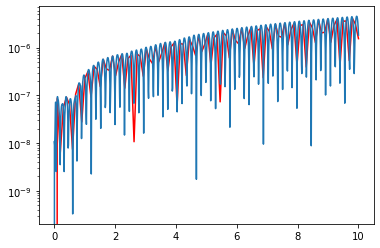

In [16]:
plt.plot(t_R,np.abs(sol3[:,0]-3*np.cos(20*t_R)),color='red')
plt.plot(t_n,np.abs(sol3n[:,0]-3*np.cos(20*t_n)))
plt.yscale('log')

The sampling time is presumably a parameter in the function itself. The easiest way to accomplish this is to change the error tolerances

In [17]:
sol5=integrate.odeint(derivative,X0,t_R,args=(0,20),atol=1e-8,rtol=1e-8)
sol6=integrate.odeint(derivative,X0,t_R,args=(0,20),atol=1e-12,rtol=1e-12)

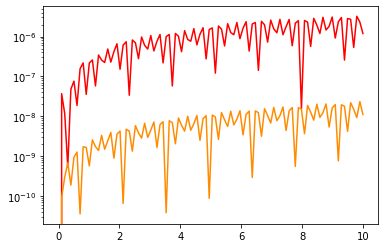

In [18]:
plt.plot(t_R,np.abs(sol5[:,0]-3*np.cos(20*t_R)),color='red')
plt.plot(t_R,np.abs(sol6[:,0]-3*np.cos(20*t_R)),color='darkorange')
#plt.plot(t_R,sol3[:,0])
plt.yscale('log')

In [19]:
t_F=np.linspace(0,10,10000) # range of time we want to solve
sol7=integrate.odeint(derivative,X0,t_F,args=(0,20),atol=1e-12,rtol=1e-12)  # Using finer spacing but fewer interal steps


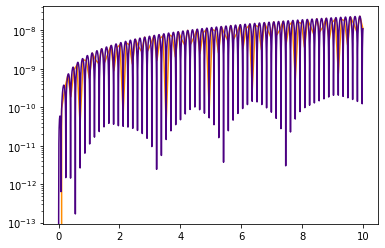

In [20]:
plt.plot(t_R,np.abs(sol6[:,0]-3*np.cos(20*t_R)),color='darkorange')
plt.plot(t_F,np.abs(sol7[:,0]-3*np.cos(20*t_F)),color='indigo')
#plt.plot(t_R,sol3[:,0])
plt.yscale('log')

In principle, we should be able to manually adjust the time steps to achieve similar improvements. If we go and read the documentation, we find that our problem is that ODEint is making a lot of decisions for us by default. However, there are some choices of maximum and minimum step size that have been turned off by default that could be used to try to enforce a small step size throughout. Yet, it seems that the way this has been implemented, it is much easier to control the error tolerance to achieve the desired result.

## Time-dependent coefficients, External Force



In [21]:
def D_time(X,t,gamma=1,omega_0=5,Fext=10,wext=2): ## X is the array [x,v]
        ## notice that we need to use t as an argument even though we don't use it
    return [X[1],-gamma*X[1]-omega_0**2*X[0]+Fext*np.cos(wext*t)] ## return the array dot X defined by our equation


In [22]:
t_T=np.linspace(0,20,200)
solT_1=integrate.odeint(D_time,X0,t_T) # now passing gamma=0 and omega_0=20


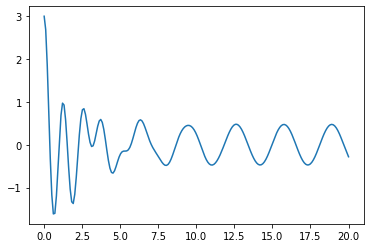

In [23]:
plt.plot(t_T,solT_1[:,0])

## Coupled ODEs

Now we want to consider the problem of coupled harmonic oscilators, obeying the equation:

$$ \ddot x +\gamma_x \dot x + \omega_x^2 (x-y) = 0$$

$$ \ddot y +\gamma_y \dot y + \omega_y^2 (y-x) = 0 $$

In [24]:
def D_coupled(X,t,gamma_x=1,omega_x=1,gamma_y=1,omega_y=1): ## X is the array [x,v]
        ## notice that we need to use t as an argument even though we don't use it
    return [X[1],-gamma_x*X[1]-omega_x**2*(X[0]-X[2]),X[3],-gamma_y*X[3]-omega_y**2*(X[2]-X[0])] ## return the array dot X defined by our equation


In [25]:
t_R=np.linspace(0,10,100) # range of time we want to solve
XC_0=[3.,0,-3.,0] 

In [26]:
solC_1=integrate.odeint(D_coupled,XC_0,t_n,args=(1,20,1,10))

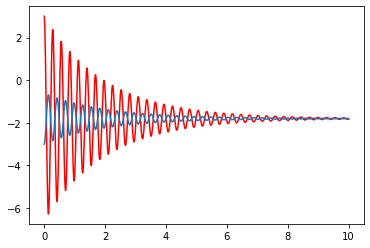

In [27]:
plt.plot(t_n,solC_1[:,0],color='red')
plt.plot(t_n,solC_1[:,2])